Start by loading all necessary packages
Abalone data was gotten from the UCI Machine Learning Repository, https://archive.ics.uci.edu/dataset/1/abalone

In [23]:
#Load Packages
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


%matplotlib inline

#load dataset
abalone_data = pd.read_csv('abalone/abalone.csv')

abalone_data.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


EDA
- UCI ML Repo claims data is clean with nulls taken out but I still want to confirm the validity of the dataset

In [24]:
#print the shape of the dataset
print(abalone_data.shape)

#check for null values
print(abalone_data.isnull().sum())

#confirm the data types
print(abalone_data.dtypes)


(4177, 9)
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object


Check for outliers

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Length'),
  Text(2, 0, 'Diameter'),
  Text(3, 0, 'Height'),
  Text(4, 0, 'Whole_weight'),
  Text(5, 0, 'Shucked_weight'),
  Text(6, 0, 'Viscera_weight'),
  Text(7, 0, 'Shell_weight'),
  Text(8, 0, 'Rings')])

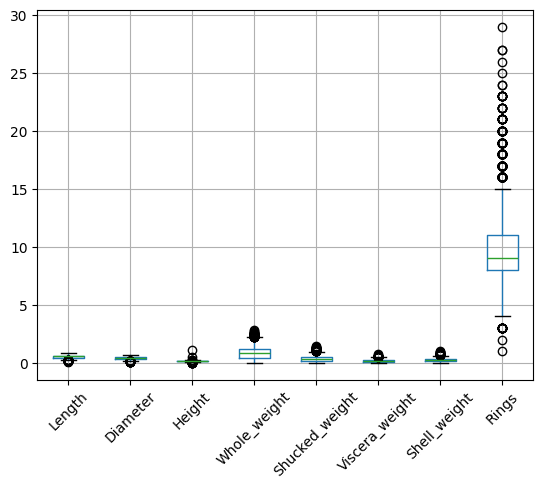

In [25]:
#plot boxplots for each feature in X
abalone_data.boxplot()
#text on the x axis should be in a 45 degree angle
plt.xticks(rotation=45)

Converting Sex to numerical representation

In [26]:
#convert sex to numerical values
new_abalone_data = pd.get_dummies(abalone_data, columns=['Sex'])

#convert Sex_I, Sex_F, Sex_M to numerical values
new_abalone_data['Sex_I'] = new_abalone_data['Sex_I'].astype(int)
new_abalone_data['Sex_F'] = new_abalone_data['Sex_F'].astype(int)
new_abalone_data['Sex_M'] = new_abalone_data['Sex_M'].astype(int)

new_abalone_data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


Run Linear Regression

In [27]:
#split the dataset into X and y
X = new_abalone_data.drop('Rings', axis=1)
y = new_abalone_data['Rings']

#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#print the shape of the train and test sets of X and y
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#run linear regression model on the train set
lr_model = LinearRegression(fit_intercept = True).fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', lr_model.score(X_train, y_train))
print('The Accuracy on the test set is:', lr_model.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

(3341, 10)
(836, 10)
(3341,)
(836,)
The Accuracy on the train set is: 0.5500798003113132
The Accuracy on the test set is: 0.46486038882278413
The r2 score on the train set is: 0.5500798003113132
The r2 score on the test set is: 0.46486038882278413
The mean squared error on the train set is: 4.695729464191312
The mean squared error on the test set is: 5.464044831462059
The mean absolute error on the train set is: 1.5707333123352514
The mean absolute error on the test set is: 1.6092526627114678
The root mean squared error on the train set is: 2.1669631893946217
The root mean squared error on the test set is: 2.337529642905531


Linear Regression with recursive feature elimination

In [28]:
from sklearn.feature_selection import RFE

sel = RFE(LinearRegression(fit_intercept = True), n_features_to_select=5, step=1)
sel = sel.fit(X, y)
sel.support_

rfe_data = X.columns[sel.support_]

#print the selected features
rfe_data

Index(['Diameter', 'Whole_weight', 'Shucked_weight', 'Viscera_weight',
       'Sex_I'],
      dtype='object')

In [29]:
X1 = new_abalone_data[rfe_data]
y1 = new_abalone_data['Rings']

#split the dataset into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=22)

#print the shape of the train and test sets of X and y
print(X_train1.shape)
print(X_test1.shape)

#run linear regression model on the train set
lr_model = LinearRegression(fit_intercept = True).fit(X_train1, y_train1)

#predict on the train set and test set
y_train_pred1 = lr_model.predict(X_train1)
y_test_pred1 = lr_model.predict(X_test1)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', lr_model.score(X_train1, y_train1))
print('The Accuracy on the test set is:', lr_model.score(X_test1, y_test1))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train1, y_train_pred1))
print('The r2 score on the test set is:', r2_score(y_test1, y_test_pred1))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train1, y_train_pred1))
print('The mean squared error on the test set is:', mean_squared_error(y_test1, y_test_pred1))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train1, y_train_pred1))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test1, y_test_pred1))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train1, y_train_pred1)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test1, y_test_pred1)))


(3341, 5)
(836, 5)
The Accuracy on the train set is: 0.5301488774982501
The Accuracy on the test set is: 0.499801379924659
The r2 score on the train set is: 0.5301488774982501
The r2 score on the test set is: 0.499801379924659
The mean squared error on the train set is: 4.9037446223606524
The mean squared error on the test set is: 5.107279722229402
The mean absolute error on the train set is: 1.5926868064723505
The mean absolute error on the test set is: 1.6107465032367538
The root mean squared error on the train set is: 2.214440024557146
The root mean squared error on the test set is: 2.2599291409753097


Linear Regression with Support Vector Regression

In [30]:
from sklearn.svm import SVR
est = SVR(kernel="linear")
sel = RFE(est, n_features_to_select=5, step=1)
sel = sel.fit(X, y)
sel.support_

svr_data = X.columns[sel.support_]

#print the selected features
svr_data

Index(['Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Shell_weight'], dtype='object')

In [31]:
X1 = new_abalone_data[rfe_data]
y1 = new_abalone_data['Rings']

#split the dataset into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=22)

#print the shape of the train and test sets of X and y
print(X_train1.shape)
print(X_test1.shape)

#run linear regression model on the train set
lr_model1 = LinearRegression(fit_intercept = True).fit(X_train1, y_train1)

#predict on the train set and test set
y_train_pred1 = lr_model1.predict(X_train1)
y_test_pred1 = lr_model1.predict(X_test1)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', lr_model1.score(X_train1, y_train1))
print('The Accuracy on the test set is:', lr_model1.score(X_test1, y_test1))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train1, y_train_pred1))
print('The r2 score on the test set is:', r2_score(y_test1, y_test_pred1))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train1, y_train_pred1))
print('The mean squared error on the test set is:', mean_squared_error(y_test1, y_test_pred1))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train1, y_train_pred1))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test1, y_test_pred1))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train1, y_train_pred1)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test1, y_test_pred1)))


(3341, 5)
(836, 5)
The Accuracy on the train set is: 0.5301488774982501
The Accuracy on the test set is: 0.499801379924659
The r2 score on the train set is: 0.5301488774982501
The r2 score on the test set is: 0.499801379924659
The mean squared error on the train set is: 4.9037446223606524
The mean squared error on the test set is: 5.107279722229402
The mean absolute error on the train set is: 1.5926868064723505
The mean absolute error on the test set is: 1.6107465032367538
The root mean squared error on the train set is: 2.214440024557146
The root mean squared error on the test set is: 2.2599291409753097


Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

randFor = RandomForestRegressor(max_depth=2, random_state=0)
randFor.fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = randFor.predict(X_train)
y_test_pred = randFor.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', randFor.score(X_train, y_train))
print('The Accuracy on the test set is:', randFor.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))



The Accuracy on the train set is: 0.4067319057993347
The Accuracy on the test set is: 0.37557599434113276
The r2 score on the train set is: 0.4067319057993347
The r2 score on the test set is: 0.37557599434113276
The mean squared error on the train set is: 6.191823510103097
The mean squared error on the test set is: 6.375683446896433
The mean absolute error on the train set is: 1.814733259914226
The mean absolute error on the test set is: 1.8117959195377418
The root mean squared error on the train set is: 2.4883374992358043
The root mean squared error on the test set is: 2.5250115736163337


Random Forest with GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

#create the parameter grid
param = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

#run grid search
grd_srh = GridSearchCV(estimator = randFor, param_grid = param,
                           cv = 3, n_jobs = -1, verbose = 2)

#fit the grid search
grd_srh.fit(X_train, y_train)

bst_grd = grd_srh.best_estimator_

bst_grd

Fitting 3 folds for each of 288 candidates, totalling 864 fits


RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=5,
                      min_samples_split=8, n_estimators=300, random_state=0)

In [34]:

bst_grd.fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = bst_grd.predict(X_train)
y_test_pred = bst_grd.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', bst_grd.score(X_train, y_train))
print('The Accuracy on the test set is:', bst_grd.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The Accuracy on the train set is: 0.7460837143314423
The Accuracy on the test set is: 0.5371601890961732
The r2 score on the train set is: 0.7460837143314423
The r2 score on the test set is: 0.5371601890961732
The mean squared error on the train set is: 2.65007480188013
The mean squared error on the test set is: 4.72582747332161
The mean absolute error on the train set is: 1.1320929079323634
The mean absolute error on the test set is: 1.523122654819663
The root mean squared error on the train set is: 1.6279050346626887
The root mean squared error on the test set is: 2.1738968405427177


k-Nearest Neighbors (k-NN)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#standardize the data
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

#create the model
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
knn.fit(X_train1, y_train)

#predict on the train set and test set
y_train_pred = knn.predict(X_train1)
y_test_pred = knn.predict(X_test1)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', knn.score(X_train1, y_train))
print('The Accuracy on the test set is:', knn.score(X_test1, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))


The Accuracy on the train set is: 0.5950314277162526
The Accuracy on the test set is: 0.21889952153110048
The r2 score on the train set is: 0.5610760466791038
The r2 score on the test set is: 0.26511081714330553
The mean squared error on the train set is: 4.580963783298413
The mean squared error on the test set is: 7.503588516746412
The mean absolute error on the train set is: 1.0514815923376235
The mean absolute error on the test set is: 1.8313397129186604
The root mean squared error on the train set is: 2.140318617238661
The root mean squared error on the test set is: 2.7392678796982253


k-Nearest Neighbors (k-NN) using GridSearchCV

In [36]:
param = {
    'n_neighbors': list(range(1,31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

grd_srh = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param,
                           cv = 3, n_jobs = -1, verbose = 2)

#fit the grid search
grd_srh.fit(X_train, y_train)

bst_grd = grd_srh.best_estimator_

bst_grd

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


c:\Users\Chike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


KNeighborsClassifier(n_neighbors=23, p=1, weights='distance')

In [37]:
bst_grd.fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = bst_grd.predict(X_train)
y_test_pred = bst_grd.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', bst_grd.score(X_train, y_train))
print('The Accuracy on the test set is:', bst_grd.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The Accuracy on the train set is: 1.0
The Accuracy on the test set is: 0.2822966507177033
The r2 score on the train set is: 1.0
The r2 score on the test set is: 0.3532084842098183
The mean squared error on the train set is: 0.0
The mean squared error on the test set is: 6.604066985645933
The mean absolute error on the train set is: 0.0
The mean absolute error on the test set is: 1.6303827751196172
The root mean squared error on the train set is: 0.0
The root mean squared error on the test set is: 2.5698379298403107


SVM

In [38]:
from sklearn import svm

#standardize the data
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

#create the model
svm = svm.SVC(kernel = 'rbf')
svm.fit(X_train1, y_train)

#predict on the train set and test set
y_train_pred = svm.predict(X_train1)
y_test_pred = svm.predict(X_test1)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', svm.score(X_train1, y_train))
print('The Accuracy on the test set is:', svm.score(X_test1, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))



The Accuracy on the train set is: 0.2876384316073032
The Accuracy on the test set is: 0.2715311004784689
The r2 score on the train set is: 0.25146330574134523
The r2 score on the test set is: 0.23406576159460102
The mean squared error on the train set is: 7.812331637234361
The mean squared error on the test set is: 7.820574162679426
The mean absolute error on the train set is: 1.7297216402274769
The mean absolute error on the test set is: 1.7416267942583732
The root mean squared error on the train set is: 2.7950548540653655
The root mean squared error on the test set is: 2.796528949015087


SVM using GridSearchCV

In [39]:
from sklearn import svm

param = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grd_srh = GridSearchCV(estimator = svm.SVC(), param_grid = param,
                           cv = 3, n_jobs = -1, verbose = 2)

#fit the grid search
grd_srh.fit(X_train, y_train)

bst_grd = grd_srh.best_estimator_

bst_grd

Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\Users\Chike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


SVC(C=10, gamma=1)

In [40]:
bst_grd.fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = bst_grd.predict(X_train)
y_test_pred = bst_grd.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', bst_grd.score(X_train, y_train))
print('The Accuracy on the test set is:', bst_grd.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The Accuracy on the train set is: 0.29123017060760253
The Accuracy on the test set is: 0.284688995215311
The r2 score on the train set is: 0.30514939790839635
The r2 score on the test set is: 0.2583160502684948
The mean squared error on the train set is: 7.252020353187668
The mean squared error on the test set is: 7.572966507177034
The mean absolute error on the train set is: 1.6770428015564203
The mean absolute error on the test set is: 1.7141148325358853
The root mean squared error on the train set is: 2.6929575476022025
The root mean squared error on the test set is: 2.7519023433212584


XG Boost Regressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=0)

gb_reg.fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = gb_reg.predict(X_train)
y_test_pred = gb_reg.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', gb_reg.score(X_train, y_train))
print('The Accuracy on the test set is:', gb_reg.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))


The Accuracy on the train set is: 0.6591571803158023
The Accuracy on the test set is: 0.5297944683218209
The r2 score on the train set is: 0.6591571803158023
The r2 score on the test set is: 0.5297944683218209
The mean squared error on the train set is: 3.5573101011169785
The mean squared error on the test set is: 4.801035190497614
The mean absolute error on the train set is: 1.359878652046197
The mean absolute error on the test set is: 1.5345216030597342
The root mean squared error on the train set is: 1.8860832699318921
The root mean squared error on the test set is: 2.191126466112263


XG Boost Regressor with GridSearchCV

In [42]:
import xgboost as xgb

param = {
    'max_depth': [3,6,9,12],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'colsample_bytree': [0.3, 0.7]
}

grd_srh = GridSearchCV(estimator = xgb.XGBRegressor(seed = 20), param_grid = param,
                           scoring='neg_mean_squared_error', verbose = 1)

#fit the grid search
grd_srh.fit(X_train, y_train)

bst_grd = grd_srh.best_params_

bst_grd

Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

In [43]:
grd_srh.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
#training the model on the returned best parameters
bst_grd = xgb.XGBRegressor(**bst_grd, seed = 20)

#fit the model
bst_grd.fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = bst_grd.predict(X_train)
y_test_pred = bst_grd.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', bst_grd.score(X_train, y_train))
print('The Accuracy on the test set is:', bst_grd.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The Accuracy on the train set is: 0.7710561149377442
The Accuracy on the test set is: 0.53448486933746
The r2 score on the train set is: 0.7710561149377442
The r2 score on the test set is: 0.53448486933746
The mean squared error on the train set is: 2.3894427222363634
The mean squared error on the test set is: 4.7531438348743436
The mean absolute error on the train set is: 1.1277827278863382
The mean absolute error on the test set is: 1.520191271339307
The root mean squared error on the train set is: 1.5457822363568432
The root mean squared error on the test set is: 2.1801705976538495


Neural Network Regressor

In [45]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state=1, max_iter=500)

mlp_reg.fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = mlp_reg.predict(X_train)
y_test_pred = mlp_reg.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', mlp_reg.score(X_train, y_train))
print('The Accuracy on the test set is:', mlp_reg.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))


The Accuracy on the train set is: 0.5832064257404925
The Accuracy on the test set is: 0.5207162602104447
The r2 score on the train set is: 0.5832064257404925
The r2 score on the test set is: 0.5207162602104447
The mean squared error on the train set is: 4.349993328795171
The mean squared error on the test set is: 4.893728265489357
The mean absolute error on the train set is: 1.4910410813461654
The mean absolute error on the test set is: 1.536950630628715
The root mean squared error on the train set is: 2.085663762161862
The root mean squared error on the test set is: 2.212177268097961


Neural Network Regressor with GridSearch

In [46]:
param = {
    'hidden_layer_sizes': [(10,30,10), (20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']
}

grd_srh = GridSearchCV(estimator = MLPRegressor(random_state=1, max_iter=500), param_grid = param,
                           n_jobs=-1, cv=5)

#fit the grid search
grd_srh.fit(X_train, y_train)

bst_grd = grd_srh.best_params_

bst_grd

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (10, 30, 10),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [47]:
grd_srh.best_estimator_

MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(10, 30, 10),
             max_iter=500, random_state=1)

In [48]:
#training the model on the returned best parameters
bst_grd = MLPRegressor(**bst_grd, random_state=1, max_iter=500)

#fit the model
bst_grd.fit(X_train, y_train)

#predict on the train set and test set
y_train_pred = bst_grd.predict(X_train)
y_test_pred = bst_grd.predict(X_test)

#print results
print('=====================================================================')
print('The Accuracy on the train set is:', bst_grd.score(X_train, y_train))
print('The Accuracy on the test set is:', bst_grd.score(X_test, y_test))
print('=====================================================================')
print('The r2 score on the train set is:', r2_score(y_train, y_train_pred))
print('The r2 score on the test set is:', r2_score(y_test, y_test_pred))
print('=====================================================================')
print('The mean squared error on the train set is:', mean_squared_error(y_train, y_train_pred))
print('The mean squared error on the test set is:', mean_squared_error(y_test, y_test_pred))
print('=====================================================================')
print('The mean absolute error on the train set is:', mean_absolute_error(y_train, y_train_pred))
print('The mean absolute error on the test set is:', mean_absolute_error(y_test, y_test_pred))
print('=====================================================================')
print('The root mean squared error on the train set is:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('The root mean squared error on the test set is:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

The Accuracy on the train set is: 0.597934207073178
The Accuracy on the test set is: 0.5563138374262493
The r2 score on the train set is: 0.597934207073178
The r2 score on the test set is: 0.5563138374262493
The mean squared error on the train set is: 4.196282344505268
The mean squared error on the test set is: 4.530259081493227
The mean absolute error on the train set is: 1.4397502306308863
The mean absolute error on the test set is: 1.4891458433308684
The root mean squared error on the train set is: 2.0484829373234397
The root mean squared error on the test set is: 2.1284405280611502
